## **Installing Tensorflow GPU**

In [ ]:
!pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 68832, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 68832 (delta 17), reused 21 (delta 16), pack-reused 68805
Receiving objects: 100% (68832/68832), 577.15 MiB | 24.99 MiB/s, done.
Resolving deltas: 100% (48511/48511), done.


In [ ]:
!pwd

/content


In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
pwd

'/content/models/research'

In [ ]:
# From within TensorFlow/models/research/
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 4.26 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-pX47U3/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-pX47U3/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [ ]:
cp -r pycocotools /content/models/research

In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
pwd

'/content/models/research'

In [ ]:
# From within TensorFlow/models/research/
!cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install --use-feature=2020-resolver .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.9 MB 12.1 MB/s 
     |████████████████████████████████| 352 kB 50.7 MB/s 
     |████████████████████████████████| 2.2 MB 31.2 MB/s 
     |████████████████████████████████| 23.1 MB 62.6 MB/s 
     |████████████████████████████████| 213 kB 53.6 MB/s 
     |████████████████████████████████| 90 kB 9.8 MB/s 
     |████████████████████████████████| 497.5 MB 25 kB/s 
     |████████████████████████████████| 99 kB 9.3 MB/s 
     |████████████████████████████████| 4.9 MB 40.2 MB/s 
     |████████████████████████████████| 1.2 MB 46

In [ ]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

Traceback (most recent call last):
  File "object_detection/builders/model_builder_tf2_test.py", line 25, in <module>
    from object_detection.builders import model_builder
  File "/usr/local/lib/python3.7/dist-packages/object_detection/builders/model_builder.py", line 37, in <module>
    from object_detection.meta_architectures import deepmac_meta_arch
  File "/usr/local/lib/python3.7/dist-packages/object_detection/meta_architectures/deepmac_meta_arch.py", line 19, in <module>
    from object_detection.models.keras_models import resnet_v1
  File "/usr/local/lib/python3.7/dist-packages/object_detection/models/keras_models/resnet_v1.py", line 22, in <module>
    from tensorflow.python.keras.applications import resnet
ModuleNotFoundError: No module named 'tensorflow.python.keras.applications'


In [ ]:
cd /content

/content


In [ ]:
import os
paths = {
          'Training_demo_path': os.path.join('Training_demo'),
          'annotations_path': os.path.join('Training_demo','annotations'),
          'exported_models_path': os.path.join('Training_demo','exported_models'),
          'images_path': os.path.join('Training_demo','images'),
          'test_path': os.path.join('Training_demo','images','test'),
          'train_path': os.path.join('Training_demo','images','train'),
          'models_path': os.path.join('Training_demo','models'),
          'pretrained_models_path': os.path.join('Training_demo','pre-trained-models'),
}


In [ ]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [ ]:
labels = [{'name':'ConnectorC01', 'id':1}]

with open('/content/Training_demo/annotations/label_map.pbtxt', 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [ ]:
cd /content/Training_demo/pre-trained-models

/content/Training_demo/pre-trained-models


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz

--2021-12-22 22:49:13--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.76.128, 2a00:1450:400c:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.76.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M  29.4MB/s    in 1.0s    

2021-12-22 22:49:15 (29.4 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]



In [ ]:
!tar -xvf efficientdet_d0_coco17_tpu-32.tar.gz

efficientdet_d0_coco17_tpu-32/
efficientdet_d0_coco17_tpu-32/checkpoint/
efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
efficientdet_d0_coco17_tpu-32/checkpoint/checkpoint
efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0.index
efficientdet_d0_coco17_tpu-32/pipeline.config
efficientdet_d0_coco17_tpu-32/saved_model/
efficientdet_d0_coco17_tpu-32/saved_model/saved_model.pb
efficientdet_d0_coco17_tpu-32/saved_model/assets/
efficientdet_d0_coco17_tpu-32/saved_model/variables/
efficientdet_d0_coco17_tpu-32/saved_model/variables/variables.data-00000-of-00001
efficientdet_d0_coco17_tpu-32/saved_model/variables/variables.index


In [ ]:
cd /content/Training_demo

/content/Training_demo


In [ ]:
# Create train data:
!python generate_tfrecord.py -x /content/Training_demo/images/train -l /content/Training_demo/annotations/label_map.pbtxt -o /content/Training_demo/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/Training_demo/images/test -l /content/Training_demo/annotations/label_map.pbtxt -o /content/Training_demo/annotations/test.record

Successfully created the TFRecord file: /content/Training_demo/annotations/train.record
Successfully created the TFRecord file: /content/Training_demo/annotations/test.record


## **Training**

In [ ]:
cd /content/Training_demo

/content/Training_demo


In [ ]:
!python model_main_tf2.py --model_dir=/content/Training_demo/models/effdet --pipeline_config_path=/content/Training_demo/models/effdet/pipeline.config

2021-12-22 22:55:33.686338: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1222 22:55:33.689716 140186361665408 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I1222 22:55:33.694926 140186361665408 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1222 22:55:33.695091 140186361665408 config_util.py:552] Maybe overwriting use_bfloat16: False
I1222 22:55:33.709610 140186361665408 ssd_efficientnet_bifpn_feature_extractor.py:143] EfficientDet EfficientNet backbone version: efficientnet-b0
I1222 22:55:33.709740 140186361665408 ssd_efficientnet_bifpn_feature_extractor.py:144] 

In [ ]:
cd /content/Training_demo

/content/Training_demo


In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/Training_demo/models/effdet/pipeline.config --trained_checkpoint_dir /content/Training_demo/models/effdet --output_directory /content/Training_demo/exported_models/my_model1

2021-12-22 23:34:43.177392: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I1222 23:34:43.186862 140461795080064 ssd_efficientnet_bifpn_feature_extractor.py:143] EfficientDet EfficientNet backbone version: efficientnet-b0
I1222 23:34:43.187094 140461795080064 ssd_efficientnet_bifpn_feature_extractor.py:144] EfficientDet BiFPN num filters: 64
I1222 23:34:43.187201 140461795080064 ssd_efficientnet_bifpn_feature_extractor.py:146] EfficientDet BiFPN num iterations: 3
I1222 23:34:43.193566 140461795080064 efficientnet_model.py:147] round_filter input=32 output=32
I1222 23:34:43.219308 140461795080064 efficientnet_model.py:147] round_filter input=32 output=32
I1222 23:34:43.219447 140461795080064 efficientnet_model.py:147] round_filter input=16 output=16
I1222 23:34:43.302599 140461795080064 efficientnet_model.py:147] round_filter input=16 output=16
I

In [ ]:
!zip -r /content/Training_demo/exported_models/my_model1.zip /content/Training_demo/exported_models

  adding: content/Training_demo/exported_models/ (stored 0%)
  adding: content/Training_demo/exported_models/my_model1/ (stored 0%)
  adding: content/Training_demo/exported_models/my_model1/saved_model/ (stored 0%)
  adding: content/Training_demo/exported_models/my_model1/saved_model/saved_model.pb (deflated 93%)
  adding: content/Training_demo/exported_models/my_model1/saved_model/assets/ (stored 0%)
  adding: content/Training_demo/exported_models/my_model1/saved_model/variables/ (stored 0%)
  adding: content/Training_demo/exported_models/my_model1/saved_model/variables/variables.index (deflated 78%)
  adding: content/Training_demo/exported_models/my_model1/saved_model/variables/variables.data-00000-of-00001 (deflated 36%)
  adding: content/Training_demo/exported_models/my_model1/checkpoint/ (stored 0%)
  adding: content/Training_demo/exported_models/my_model1/checkpoint/ckpt-0.data-00000-of-00001 (deflated 36%)
  adding: content/Training_demo/exported_models/my_model1/checkpoint/ckpt

## **Load Train Model From Checkpoint**

In [ ]:
cd /content

/content


In [ ]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
paths_test = {
          'exported_model_path': os.path.join('Testing_demo'),
          'my_model_path': os.path.join('Testing_demo','my_model'),
          'checkpoint_path': os.path.join('Testing_demo','my_model','checkpoint'),
          'saved_model_path': os.path.join('Testing_demo','my_model','saved_model'),
          'assets_path': os.path.join('Testing_demo','my_model','saved_model','assets'),
          'variables_path': os.path.join('Testing_demo','my_model','saved_model','variables'),
          'test_path': os.path.join('Testing_demo','test'),
          'test_images_path': os.path.join('Testing_demo','test','test_images'),
          'test_video_path': os.path.join('Testing_demo','test','test_video')
}

In [ ]:
for path in paths_test.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file('/content/Training_demo/exported_models/my_model1/pipeline.config')
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join('/content/Training_demo/exported_models/my_model1/checkpoint', 'ckpt-0')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

## **Detections on Test Images**

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
cd /content

/content


In [ ]:
category_index = label_map_util.create_category_index_from_labelmap('/content/Training_demo/annotations/label_map.pbtxt')


In [ ]:
IMAGE_PATH = os.path.join('/content/Training_demo/images/test', 'IMG_20200226_173243(1).jpg')
IMAGE_PATH

'/content/Training_demo/images/test/IMG_20200226_173243(1).jpg'

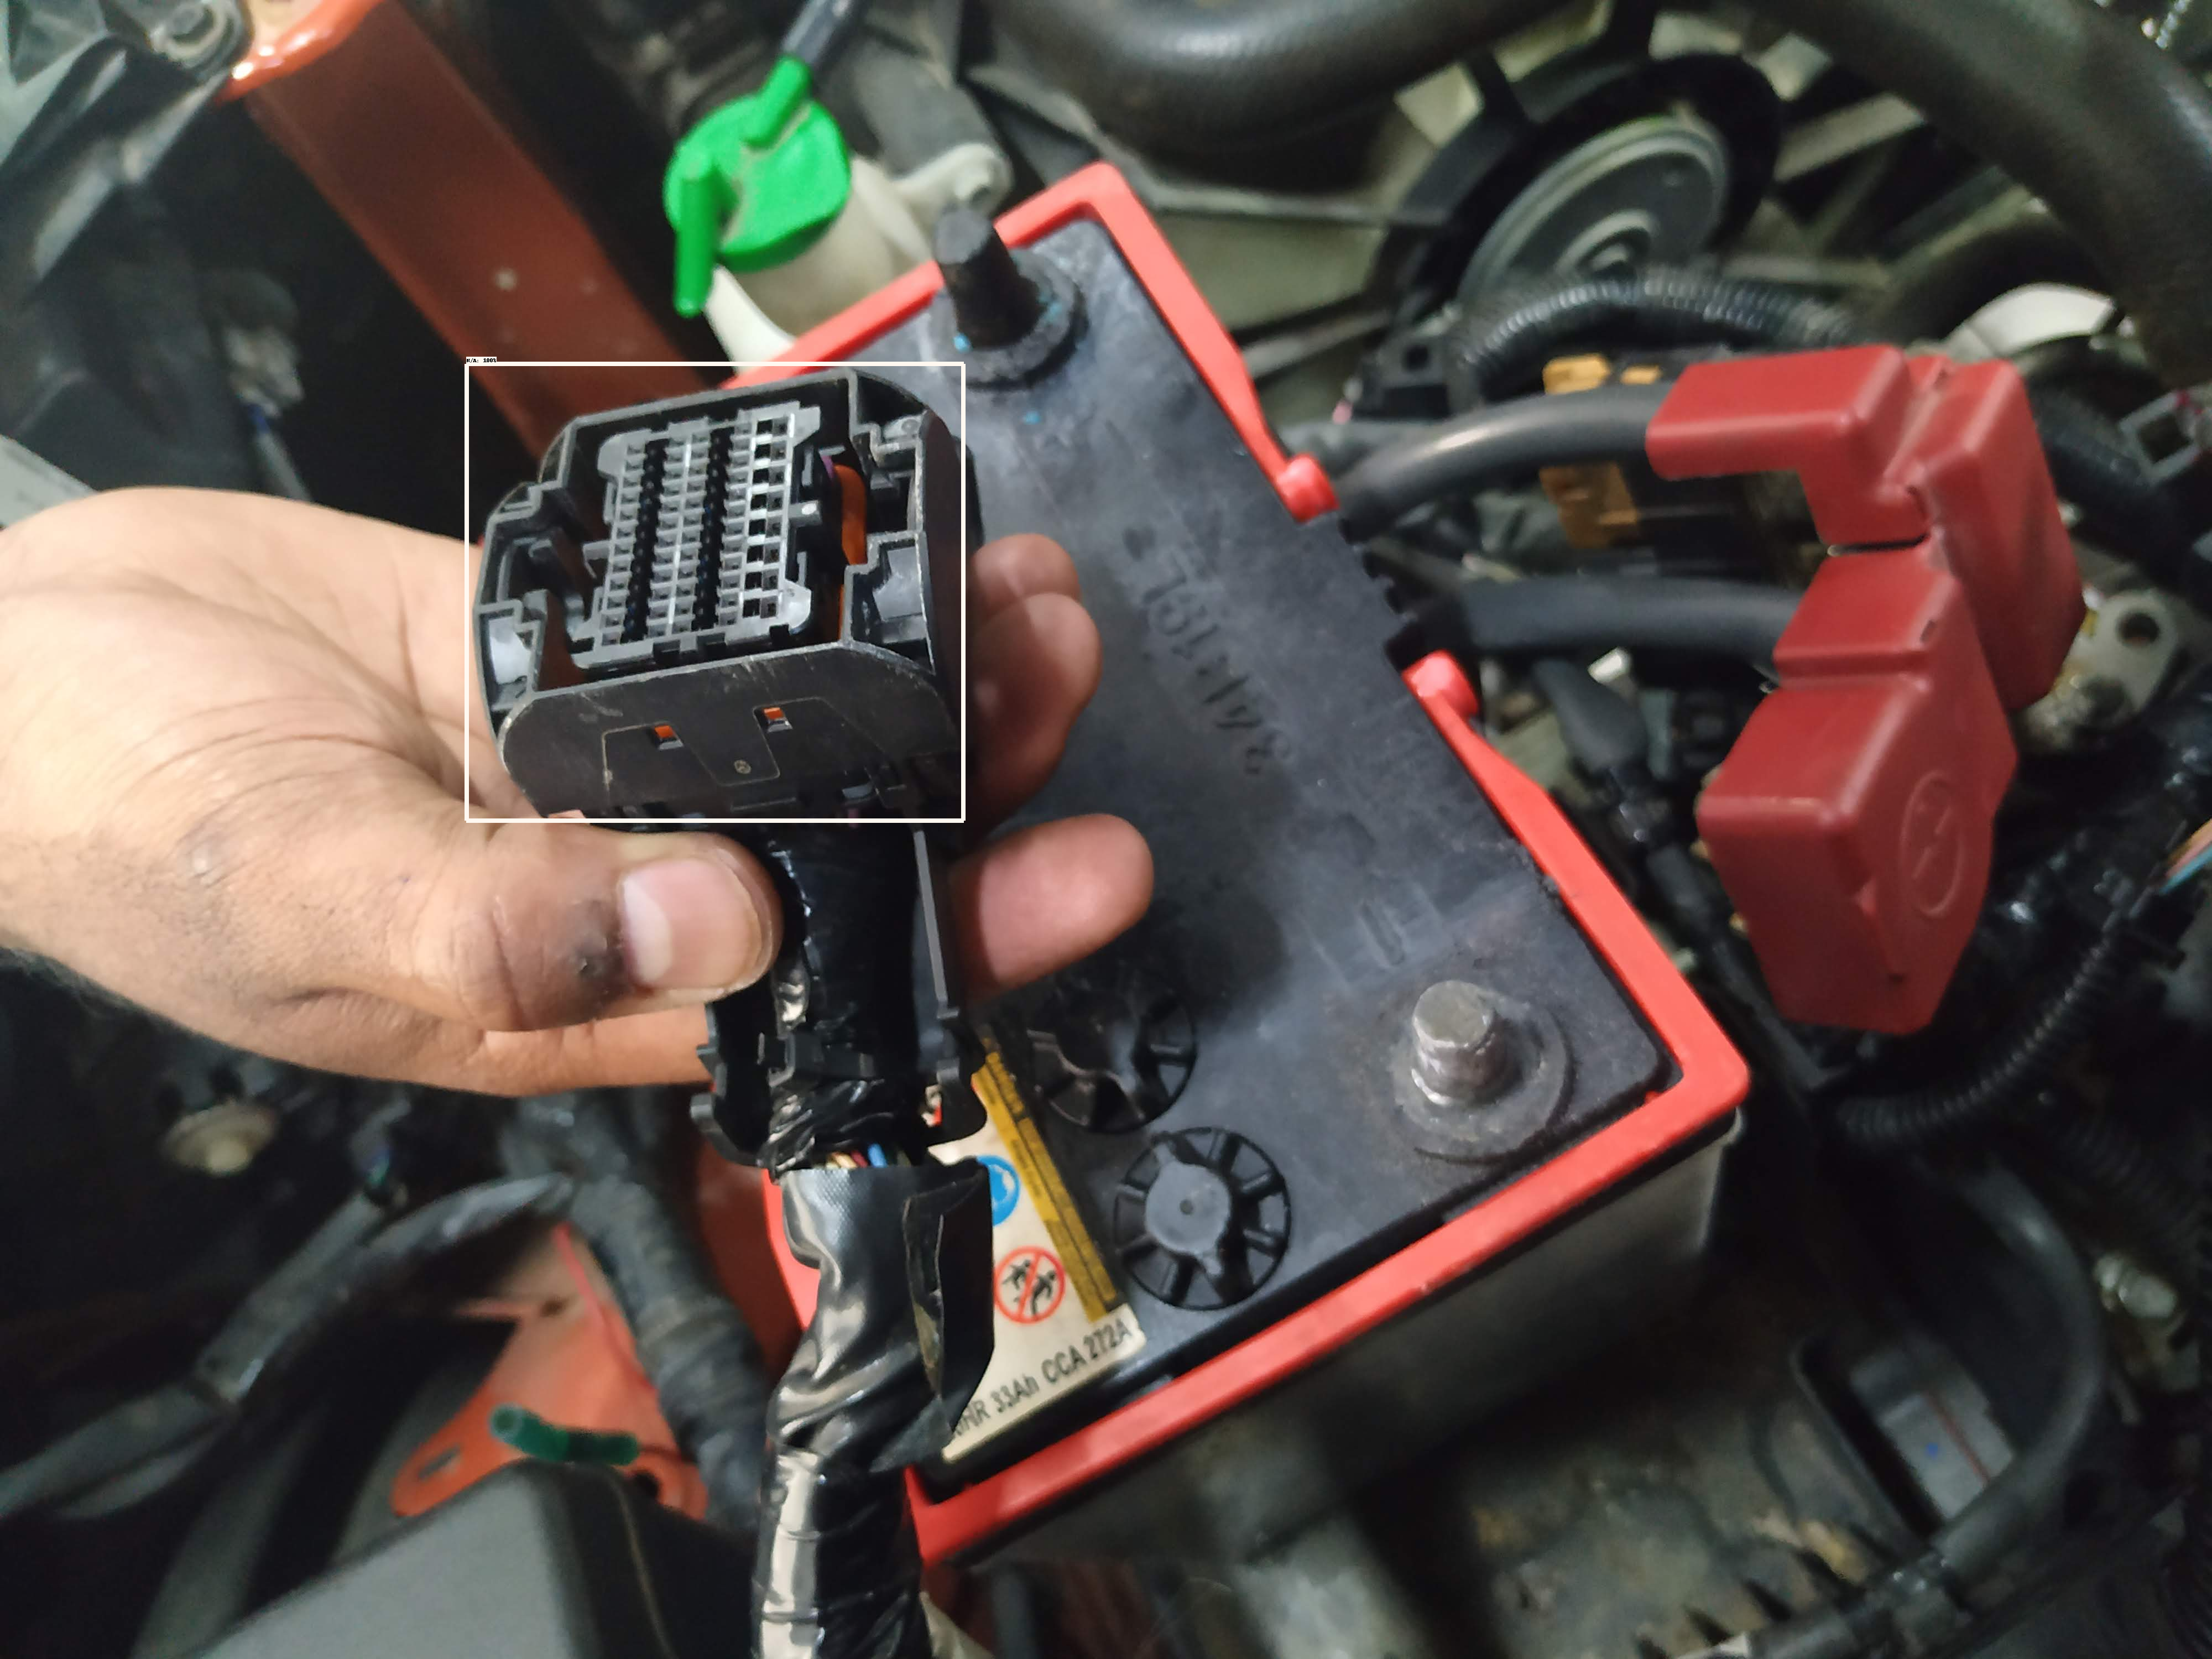

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()
# Visualization of the results of a detection.
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'],
    detections['detection_scores'],
    category_index,
    instance_masks=detections.get('detection_masks_reframed', None),
    use_normalized_coordinates=True,
    line_thickness=8)

# label_id_offset = 1
# image_np_with_detections = image_np.copy()

# viz_utils.visualize_boxes_and_labels_on_image_array(
#             image_np_with_detections,
#             detections['detection_boxes'],
#             detections['detection_classes']+label_id_offset,
#             detections['detection_scores'],
#             category_index,
#             use_normalized_coordinates=True,
#             max_boxes_to_draw=5,
#             min_score_thresh=.8,
#             agnostic_mode=False)


cv2_imshow(image_np_with_detections)
plt.show()

### **Detections on Video Feed**

In [ ]:
import os
import pathlib
import cv2
import PIL

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
import tensorflow_hub as hub

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import io
import html
import time

Detector Function

In [ ]:
def run_inference_for_single_image(image, live_cam):
    
    # convert image into numpy
    image = np.asarray(image)
    #print('Converted image into numpy type:', type(image))
    
    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(np.expand_dims(image, 0), dtype=tf.float32)
    #print('Converted numpy into tensor format:', input_tensor)
    
    
    # Run inference
    if not live_cam:
      start_time = time.time()
      output_dict = detect_fn(input_tensor)
      end_time = time.time()
      print(f"Inference time: {np.ceil(end_time-start_time)} seconds per frame")

    output_dict = detect_fn(input_tensor)
    num_detections = int(output_dict.pop('num_detections')) # 300

    
    output_dict = {key: value[0, :num_detections].numpy()
                   for key, value in output_dict.items()}
    
    output_dict['num_detections'] = num_detections

    # detection_classes should be ints.
    output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
    
    return output_dict

def run_inference_video(video_path, live_cam):
  cap = cv2.VideoCapture(video_path)
  if cap.isOpened():
      width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
      height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
      res=(int(width), int(height))
      fourcc = cv2.VideoWriter_fourcc(*"XVID") #codec
      out = cv2.VideoWriter('/content/Training_demo/output_6_effdet.avi', fourcc, 20.0, res)
      frame = None

      while True:
          try:
              is_success, image = cap.read()
          except cv2.error:
              continue

          if not is_success:
              break

          image_np = np.array(image)
          output_dict = run_inference_for_single_image(image_np, live_cam)
          
          # Visualization of the results of a detection.
          # viz_utils.visualize_boxes_and_labels_on_image_array(

          label_id_offset = 1
          image_np_with_detections = image_np.copy()

          viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                output_dict['detection_boxes'],
                output_dict['detection_classes']+label_id_offset,
                output_dict['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

          out.write(image_np_with_detections)

      out.release() 

      # OPTIONAL: show last image
      if frame:
        cv2_imshow(frame)

  cap.release()


Run inference on captured video

In [ ]:
#Inference on captured video
video_path = '/content/Training_demo/6.avi'
run_inference_video(video_path, live_cam=False)

''' Download "detected_output.avi" video and play in your laptop video player '''

Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference ti

' Download "detected_output.avi" video and play in your laptop video player '

**Conversion from .avi to .mp4**

In [ ]:
# Input video path
save_path = "/content/test/detected_output.avi"

# Compressed video path
compressed_path = "/content/test/compressed_output.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## **Exporting to TFJS**

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 4.1 MB/s 


In [ ]:
!tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default /content/Training_demo/exported_models/my_model1/saved_model /content/Training_demo/tfjsexport

2021-12-23 00:13:38.117064: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Writing weight file /content/Training_demo/tfjsexport/model.json...


In [ ]:
!zip -r /content/Training_demo/tfjs.zip /content/Training_demo/tfjsexport

  adding: content/Training_demo/tfjsexport/ (stored 0%)
  adding: content/Training_demo/tfjsexport/group1-shard2of4.bin (deflated 7%)
  adding: content/Training_demo/tfjsexport/group1-shard3of4.bin (deflated 7%)
  adding: content/Training_demo/tfjsexport/group1-shard4of4.bin (deflated 7%)
  adding: content/Training_demo/tfjsexport/group1-shard1of4.bin (deflated 12%)
  adding: content/Training_demo/tfjsexport/model.json (deflated 96%)
